# Poisson matrix factorization


**STATS271/371: Applied Bayesian Statistics**

_Stanford University. Winter, 2021._

---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slinderman/stats271sp2021/blob/main/notebooks/Lap_5_Poisson_MF.ipynb)

**Poisson matrix factorization** is a probabilistic model for non-negative matrix factorization. Let $\mathbf{X} \in \mathbb{N}^{N \times M}$ denote a count matrix with entries $x_{n,m}$. We model each entry as a Poisson random variable,
\begin{align}
x_{n,m} &\sim \mathrm{Po}\Big(\boldsymbol{\theta}_{n}^\top \boldsymbol{\eta}_{m} \Big)
= \mathrm{Po}\Big(\sum_{k=1}^K \theta_{n,k} \eta_{m,k} \Big),
\end{align}
where $\boldsymbol{\theta}_{n} \in \mathbb{R}_+^K$ and $\boldsymbol{\eta}_{n} \in \mathbb{R}_+^K$ are _non-negative_ feature vectors for row $n$ and column $m$, respectively. 

PMF has been used for recommender systems, aka collaborative filtering. In a recommender system, the rows correspond to users, the columns to items, and the entries $x_{n,m}$ to how much user $n$ liked item $m$ (on a scale of $0,1,2,\ldots$ stars, for example). The $K$ feature dimensions capture different aspects of items that users may weight in their ratings.

Note that the Poisson rate must be non-negative. It is sufficient to ensure $\boldsymbol{\theta}_{n}$ and $\boldsymbol{\eta}_{m}$ are non-negative. To that end, PMF places a gamma prior,
\begin{align}
\theta_{n,k} &\sim \mathrm{Ga}(\alpha_\theta, \beta_\theta) \\
\eta_{m,k} &\sim \mathrm{Ga}(\alpha_\eta, \beta_\eta),
\end{align}
where $\alpha_\star$ and $\beta_\star$ are hyperparameters. When $\alpha_\star < 1$, the gamma distribution has a sharp peak at zero and the prior induces sparsity in the feature vectors.

## Latent variable formulation
PMF can be rewritten in terms of a latent variable model. Note that,
\begin{align}
x_{n,m} \sim \mathrm{Po}\Big(\sum_{k=1}^K \theta_{n,k} \eta_{m,k} \Big)
\iff x_{n,m} &= \sum_{k=1}^K z_{n,m,k} \\
z_{n,m,k} &\sim \mathrm{Po}(\theta_{nk} \eta_{mk}) \quad \text{independently}.
\end{align}
From this perspective, a user's rating of an item is a sum of ratings along each feature dimension, and each feature rating is an independent Poisson random variable. 

The joint distribution is,
\begin{align}
p(\mathbf{X}, \mathbf{Z}, \boldsymbol{\Theta}, \mathbf{H}) 
= 
\left[\prod_{n=1}^N \prod_{m=1}^M \mathbb{I}\Big[x_{n,m}=\sum_{k=1}^K z_{n,m,k} \Big] 
\prod_{k=1}^K \mathrm{Po}(z_{n,m,k} \mid \theta_{n,k} \eta_{m,k}) 
\right] 
\times \left[ \prod_{n=1}^N \prod_{k=1}^K \mathrm{Ga}(\theta_{n,k} \mid \alpha_\theta, \beta_\theta) \right]
\times \left[ \prod_{m=1}^M \prod_{k=1}^K \mathrm{Ga}(\eta_{m,k} \mid \alpha_\eta, \beta_\eta) \right]
\end{align}
where $\mathbf{Z} \in \mathbb{N}^{N\times M \times K}$ denotes the _tensor_ of feature ratings, $\boldsymbol{\Theta} \in \mathbb{R}_+^{N \times K}$ is a matrix with rows $\boldsymbol{\theta}_n$, and $\mathbf{H} \in \mathbb{R}_+^{M \times K}$ is a matrix with rows $\boldsymbol{\eta}_m$. 

## Conditional distributions

Since this model is constructed from conjugate exponential family distributions, the conditionals are available in closed form. Letting $\mathbf{z}_{n,m} = (z_{n,m,1}, \ldots, z_{n,m,K})$, we have,
\begin{align}
p(\mathbf{z}_{n,m} \mid x_{n,m}, \boldsymbol{\theta}_{n}, \boldsymbol{\eta}_{m}) 
&\propto\mathbb{I}\Big[x_{n,m}=\sum_{k=1}^K z_{n,m,k} \Big] 
\prod_{k=1}^K \mathrm{Po}(z_{n,m,k} \mid \theta_{n,k} \eta_{m,k}) \\
&\propto \mathbb{I}\Big[x_{n,m}=\sum_{k=1}^K z_{n,m,k} \Big] 
\prod_{k=1}^K \frac{1}{z_{n,m,k}!} (\theta_{n,k} \eta_{m,k})^{z_{n,m,k}} \\
&\propto
\mathrm{Mult}( \mathbf{z}_{n,m} \mid x_{n,m}, \boldsymbol{\pi}_{n,m}) \\
\boldsymbol{\pi}_{n,m} &= \left(\frac{\theta_{n,1}\eta_{m,1}}{\boldsymbol{\theta}_n^\top \boldsymbol{\eta}_m}, \ldots, \frac{\theta_{n,K}\eta_{m,K}}{\boldsymbol{\theta}_n^\top \boldsymbol{\eta}_m} \right)
\end{align}
For the per-user parameters,
\begin{align}
p(\theta_{n,k} \mid \mathbf{Z}, \mathbf{H}) 
&\propto \left[ \prod_{m=1}^M \mathrm{Po}(z_{n,m,k} \mid \theta_{n,k} \eta_{m,k}) \right] \mathrm{Ga}(\theta_{n,k} \mid \alpha_\theta, \beta_\theta) \\
&\propto \left[ \prod_{m=1}^M (\theta_{n,k} \eta_{m,k})^{z_{n,m,k}} e^{-\theta_{n,k} \eta_{m,k}} \right] \mathrm{Ga}(\theta_{n,k} \mid \alpha_\theta, \beta_\theta) \\
&\propto \mathrm{Ga} \Big(\theta_{n,k} \mid \alpha_{\theta} + \sum_{m=1}^M z_{n,m,k}, \, \beta_\theta + \sum_{m=1}^M \eta_{m,k} \Big),
\end{align}
and by symmetry
\begin{align}
p(\eta_{n,k} \mid \mathbf{Z}, \boldsymbol{\Theta})
&\propto \mathrm{Ga} \Big(\eta_{m,k} \mid \alpha_{\eta} + \sum_{n=1}^N z_{n,m,k}, \, \beta_\eta + \sum_{n=1}^N \theta_{n,k} \Big).
\end{align}

## Coordinate ascent variational inference

The optimal mean field factors have the same forms as the conditional distributions above.

**Exercise:** Show that,
\begin{align}
q(\mathbf{z}_{n,m}; \boldsymbol{\lambda}^{(z)}_{n,m}) 
&= \mathrm{Mult}(\mathbf{z}_{n,m}; x_{n,m}, \boldsymbol{\lambda}^{(z)}_{n,m}) \\
\log \lambda^{(z)}_{n,m,k} &= \mathbb{E}_q[\log \theta_{n,k} + \log \eta_{m,k}] + c
\end{align}
and
\begin{align}
q(\theta_{n,k}; {\lambda}^{(\theta)}_{n,k,1}, {\lambda}^{(\theta)}_{n,k,2}) 
&= \mathrm{Ga}(\theta_{n,k}; {\lambda}^{(\theta)}_{n,k,1}, {\lambda}^{(\theta)}_{n,k,2}) \\
{\lambda}^{(\theta)}_{n,k,1} &=  \alpha_\theta + \sum_{m=1}^M \mathbb{E}_q[z_{n,m,k}] \\
{\lambda}^{(\theta)}_{n,k,2} &=  \beta_\theta + \sum_{m=1}^M \mathbb{E}_q[\eta_{m,k}] 
\end{align}
and
\begin{align}
q(\eta_{m,k}; {\lambda}^{(\eta)}_{m,k,1}, {\lambda}^{(\eta)}_{m,k,2}) 
&= \mathrm{Ga}(\eta_{m,k}; {\lambda}^{(\eta)}_{m,k,1}, \lambda^{(\eta)}_{m,k,2}) \\
{\lambda}^{(\eta)}_{m,k,1} &=  \alpha_\eta + \sum_{n=1}^N \mathbb{E}_q[z_{n,m,k}] \\
{\lambda}^{(\eta)}_{m,k,2} &=  \beta_\eta + \sum_{n=1}^N \mathbb{E}_q[\theta_{m,k}] 
\end{align}

The expectations are available in closed form,
\begin{align}
\mathbb{E}_q[\log \theta_{n,k} + \log \eta_{m,k}]
&= \mathbb{E}_q[\log \theta_{n,k}] + \mathbb{E}_q[\log \eta_{m,k}] \\
\mathbb{E}_q[z_{n,m,k}] &= x_{n,m} \pi_{n,m,k} \\
&= \psi(\lambda^{(\theta)}_{n,k,1}) - \log \lambda^{(\theta)}_{n,k,2} 
+ \psi(\lambda^{(\eta)}_{m,k,1}) - \log \lambda^{(\eta)}_{m,k,2} \\
\mathbb{E}_q[\theta_{n,k}] &= \frac{\lambda^{(\theta)}_{n,k,1}}{\lambda^{(\theta)}_{n,k,2}} \\
\mathbb{E}_q[\eta_{n,k}] &= \frac{\lambda^{(\eta)}_{m,k,1}}{\lambda^{(\eta)}_{m,k,2}} \\
\end{align}

## ELBO Calculation

The ELBO is a little tricky here. We need expectations of the Poisson log pmf under $q(z)$, $q(\theta)$ and $q(\eta)$. As you'll see below, we'll plug in $\mathbb{E}_q[z]$ instead of taking an expectation over $z$ in order to simplify the calculation, but you could use better estimates for this step.

In [1]:
!pip install tfp-nightly

In [2]:
import numpy as onp
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import trange

from jax import jit
import jax.numpy as np
import jax.scipy.special as spsp
import jax.random as jr

import tensorflow_probability as tfp
import tensorflow_probability.substrates.jax.distributions as tfd

# Simulate data

Max data:   16
num zeros:  96672


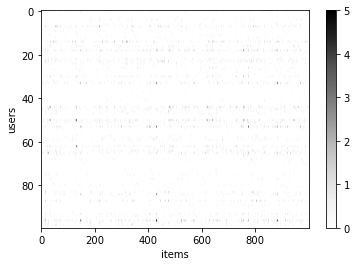

In [3]:
# Constants
N = 100   # num "users"
M = 1000  # num "items"
K = 5     # number of latent factors

# Hyperparameters
alpha = 0.1  # sparse gamma prior with mean alpha/beta 
beta = 1.0

# Make random keys to sample the model
rng1, rng2, rng3 = jr.split(jr.PRNGKey(0), 3)

# TFD sampling is throwing weird warnings today so use jr instead
# theta = tfd.Gamma(alpha, rate=beta).sample(sample_shape=(N, K), seed=rng1)
# eta = tfd.Gamma(alpha, rate=beta).sample(sample_shape=(M, K), seed=rng2)
# data = tfd.Poisson(theta @ eta.T).sample(seed=rng3)
theta = jr.gamma(rng1, alpha, shape=(N, K)) / beta
eta = jr.gamma(rng2, alpha, shape=(M, K)) / beta
data = jr.poisson(rng3, theta @ eta.T, shape=(N, M))

# Plot the data matrix
plt.imshow(data, aspect="auto", vmax=5, cmap="Greys")
plt.xlabel("items")
plt.ylabel("users")
plt.colorbar()

print("Max data:  ", data.max())
print("num zeros: ", np.sum(data == 0))

# Approach 2: Use Tensorflow Probability classes

In [4]:
def gamma_expected_log(gamma):
    """Helper function to compute expected log under gamma distribution.
    """
    return spsp.digamma(gamma.concentration) - np.log(gamma.rate)

def expected_poisson_logpdf(x, expected_rate, expected_log_rate):
    """Helper function to compute the expected logpdf under a Poisson.
    """
    return -spsp.gammaln(x + 1) + x * expected_log_rate - expected_rate


In [5]:
def cavi(data, 
         num_factors=10, 
         num_iters=100, 
         tol=1e-5, 
         alpha_theta=0.1,
         beta_theta=1.0,
         alpha_eta=0.1,
         beta_eta=1.0,
         seed=0
        ):
    """Run coordinate ascent VI for Poisson matrix factorization.
    """
    data = data.astype(np.float32)
    N, M = data.shape
    K = num_factors      # short hand
    
    def cavi_step(q_z, q_theta, q_eta):
        """One step of CAVI.
        """
        # Update the topic assignment counts
        E_logtheta = gamma_expected_log(q_theta)
        E_logeta = gamma_expected_log(q_eta)
        q_z = tfd.Multinomial(data, logits=E_logtheta[:, None, :] + E_logeta)
        
        # Compute the mean of q(z) since we'll use it twice below
        E_z = q_z.mean()
        
        # Update the per-user posterior
        q_theta = tfd.Gamma(alpha_theta + E_z.sum(axis=1), 
                            beta_theta + q_eta.mean().sum(axis=0))
        
        # Update the per-item posterior
        q_eta = tfd.Gamma(alpha_eta + E_z.sum(axis=0), 
                          beta_eta + q_theta.mean().sum(axis=0))
        
        return q_z, q_theta, q_eta
    
    def elbo(key, q_z, q_theta, q_eta):
        """Compute the evidence lower bound.
        
        key: a jr.PRNGKey in case you need to use a Monte Carlo
             estimate of the ELBO.
        
        q_z, q_theta, q_eta: posterior approximations.
        """
        elbo = 0
        
        # KL to prior
        elbo -= q_theta.kl_divergence(tfd.Gamma(alpha_theta, beta_theta)).sum()
        elbo -= q_eta.kl_divergence(tfd.Gamma(alpha_eta, beta_eta)).sum()
        
        # Compute expectations for E_q[log p(z | \theta, \eta)]
        E_logtheta = gamma_expected_log(q_theta)
        E_logeta = gamma_expected_log(q_eta)
        E_log_rate = E_logtheta[:, None, :] + E_logeta
        E_rate = q_theta.mean()[:, None, :] * q_eta.mean()
        
        # Approximate E_q[log p(z | \theta, \eta)] by plugging in E_q[z] rather
        # than taking an expectation over z. This should be close but not exactly 
        # the ELBO, so it might not *strictly* increase!
        elbo += expected_poisson_logpdf(q_z.mean(), E_rate, E_log_rate).sum()
        
        return elbo / np.sum(data)
    
    # Initialize the variational posteriors.
    # Note: it's a good idea to randomize these in practice!
    key = jr.PRNGKey(seed)
    q_theta = tfd.Gamma(alpha_theta * np.ones((N, K)), beta_theta * np.ones((N, K)))
    q_eta = tfd.Gamma(alpha_eta * np.ones((M, K)), beta_eta * np.ones((M, K)))
    q_z = tfd.Multinomial(data, logits=np.zeros((N, M, K)))
    
    # Run CAVI
    key, elbo_key = jr.split(key)
    elbos = [elbo(elbo_key, q_z, q_theta, q_eta)]
    for itr in trange(num_iters):
        q_z, q_theta, q_eta = cavi_step(q_z, q_theta, q_eta)
        
        # Compute a Monte Carlo approximation of the ELBO
        key, elbo_key = jr.split(key)
        elbos.append(elbo(elbo_key, q_z, q_theta, q_eta))
        
    return np.array(elbos), (q_z, q_theta, q_eta)
        

In [6]:
elbos, (q_z, q_theta, q_eta) = cavi(data)

Text(0, 0.5, 'ELBO per entry')

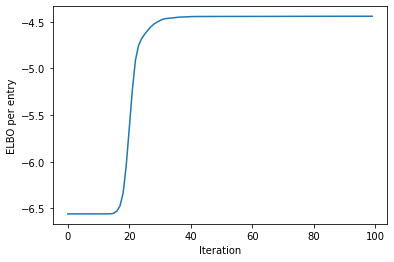

In [7]:
plt.plot(elbos[1:])
plt.xlabel("Iteration")
plt.ylabel("ELBO per entry")

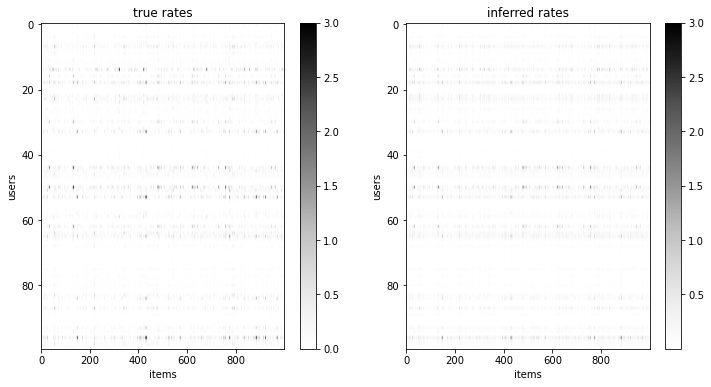

In [8]:
true_rates = theta @ eta.T
inf_rates = q_theta.mean() @ q_eta.mean().T

# Plot the data matrix
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(true_rates, aspect="auto", vmax=3, cmap="Greys")
plt.xlabel("items")
plt.ylabel("users")
plt.title("true rates")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(inf_rates, aspect="auto", vmax=3, cmap="Greys")
plt.xlabel("items")
plt.ylabel("users")
plt.title("inferred rates")
plt.colorbar()
